## Лабораторна робота 5. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
customer_set = pd.read_csv('./Mall_Customers.csv')

In [3]:
customer_set.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
customer_set = customer_set.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'})

**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [5]:
customer_set.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [6]:
customer_set.shape

(200, 5)

In [7]:
customer_set.describe()

,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
print('NaN present:')
customer_set.isna().sum()

NaN present:


CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [9]:
customer_set = customer_set.drop('CustomerID', axis=1)

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

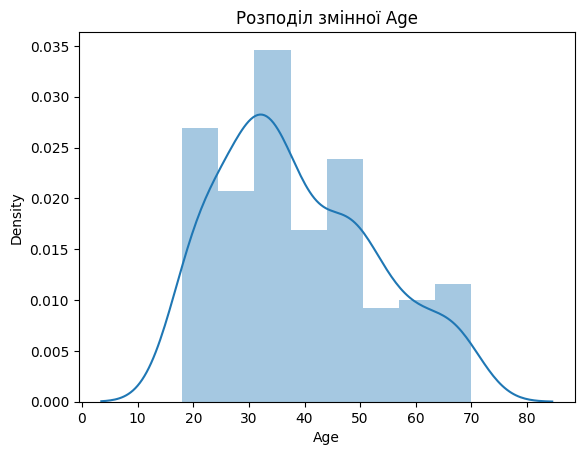

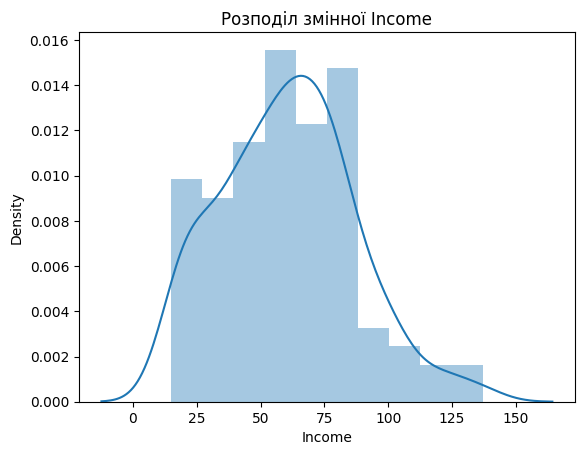

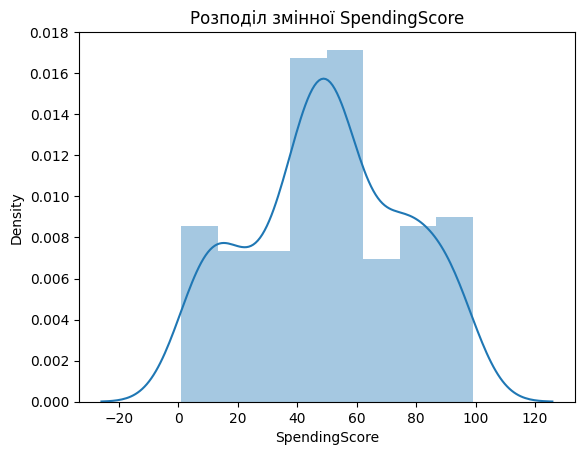

In [10]:
sns.distplot(customer_set['Age']).set(title='Розподіл змінної Age')
plt.show()

sns.distplot(customer_set['Income']).set(title='Розподіл змінної Income')
plt.show()

sns.distplot(customer_set['SpendingScore']).set(title='Розподіл змінної SpendingScore')
plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

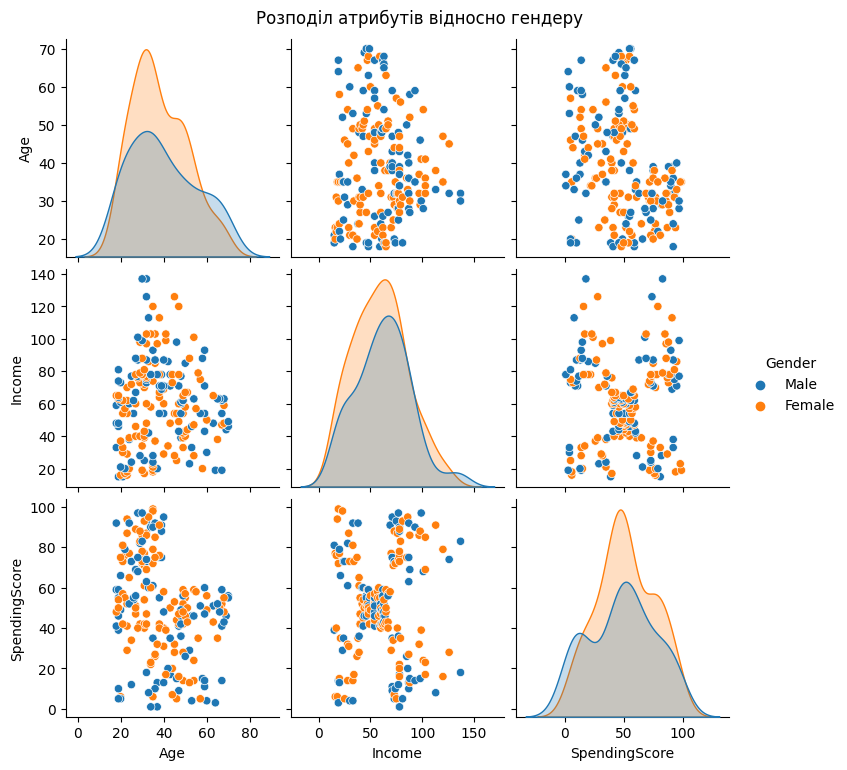

In [11]:
sns.pairplot(customer_set, hue='Gender')
plt.gcf().suptitle('Розподіл атрибутів відносно гендеру', y=1.02)
plt.show()

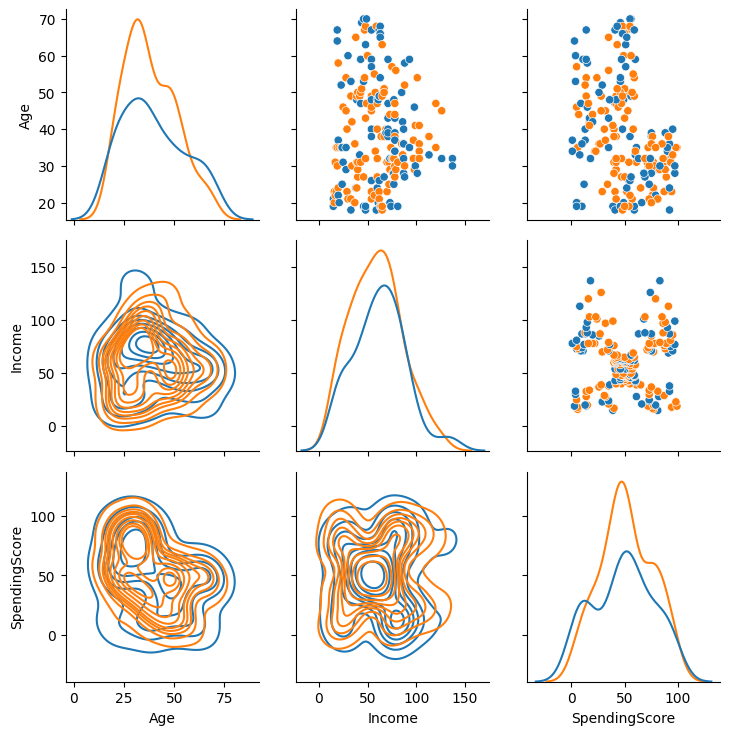

In [12]:
gr = sns.PairGrid(customer_set, hue='Gender', diag_sharey=False)
gr.map_upper(sns.scatterplot)
gr.map_diag(sns.kdeplot)
gr.map_lower(sns.kdeplot, lw=1)

plt.show()

**Висновки з 1-4 завдання (детальні)**

*Завдання 1.* Завантаживши датасет, ми перейменували непрактичні назви на більш зручні, а саме: `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`. Визначили, що наш сет не має пустих значень. 

*Завдання 2.* Видалили непотрібну для аналізу колонку `CustomerID`, бо вона не впливає ні на що.

*Завдання 3.* Побудували діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`. З цих даних можемо визначити, що основна частина прибутку належить діапазону значень 50-80, більшість клієнтів віком 30-40 років та значення витрат має гарний стандартний розподіл з центральною частиною в 40-60.

*Завдання 4.* В даному завданні ми переглянули залежність атрибутів від статі. Як визначили, гендер має мінімальний вплив на розподіл даних.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie` по `Gender'.  


Співвідношення по статтям
Female:	 56.00%
Male:	 44.00%



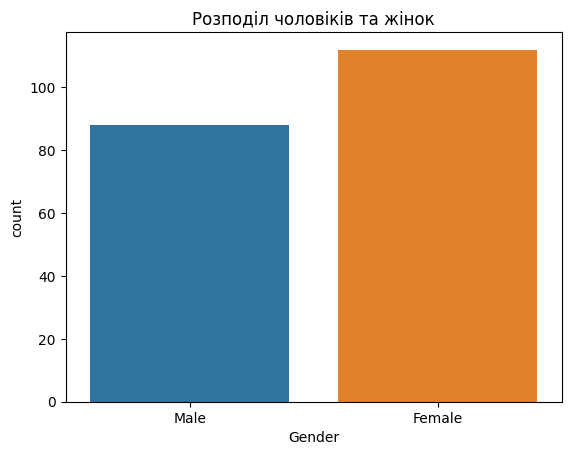

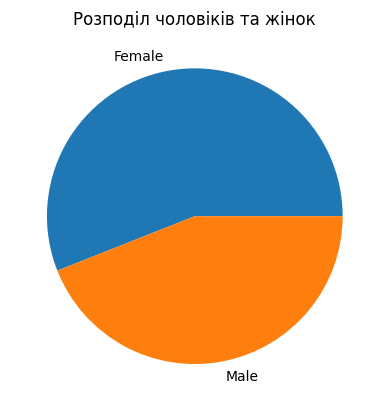

In [13]:
x = customer_set.groupby('Gender')['Gender'].count()
print(f"""
Співвідношення по статтям
Female:\t {x['Female']/customer_set.shape[0]*100:.2f}%
Male:\t {x['Male']/customer_set.shape[0]*100:.2f}%
""")

sns.countplot(customer_set, x='Gender').set(title='Розподіл чоловіків та жінок')
plt.show()


plt.pie(customer_set['Gender'].value_counts(), labels=['Female', 'Male'])
plt.title('Розподіл чоловіків та жінок')
plt.show()


**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

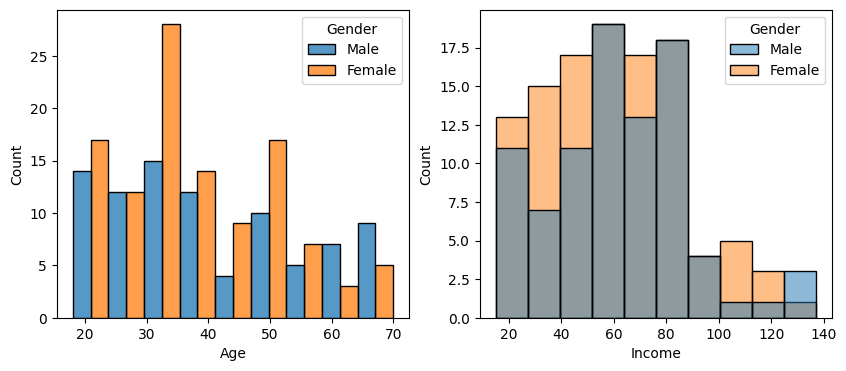

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(customer_set, x='Age', hue='Gender', multiple='dodge', ax=ax[0])
sns.histplot(customer_set, x='Income', hue='Gender', multiple='layer', ax=ax[1])
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



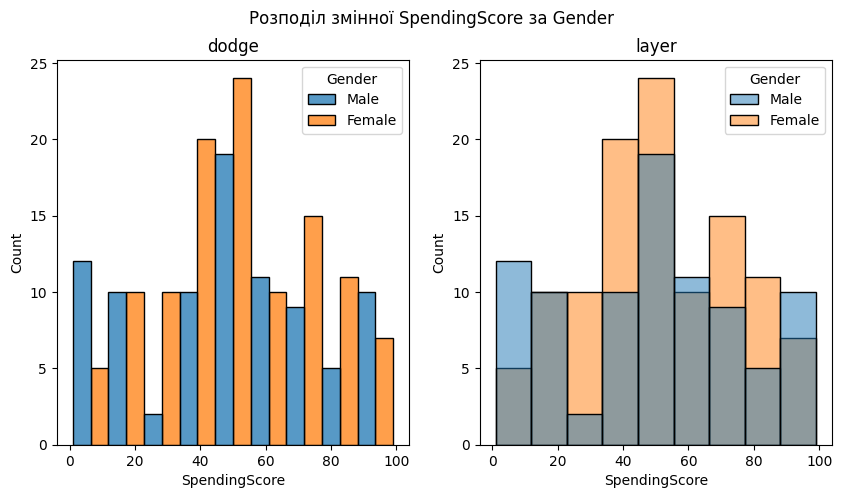

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', ax=ax[0]).set(title='dodge')
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', ax=ax[1]).set(title='layer')
fig.suptitle('Розподіл змінної SpendingScore за Gender')
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

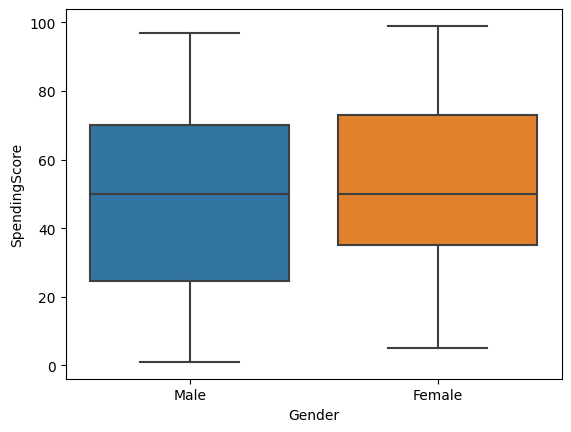

In [16]:
sns.boxplot(customer_set, y='SpendingScore', x='Gender')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок? 
    Жінок більше. Співвідношення 56% до 44%.

2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? 
    Групи: ті, що мало витрачають; ті, що достатньо витрачають; ті, шо витрачають багато. 
    Жінки витрачають набагато більше аніж чоловіки, але розкид витрат значно більший у чоловіків.

3. Чи є різниця між витратами у чоловіків та жінок?
    Є, але вони доволі незначні.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))


Кількість кластерів: 2
Коефіцієнт: 30.11722673262042
Коефіцієнт силуету: 0.293166070535953

Кількість кластерів: 3
Коефіцієнт: 24.013910603806483
Коефіцієнт силуету: 0.3839349967742105

Кількість кластерів: 4
Коефіцієнт: 20.468250917276343
Коефіцієнт силуету: 0.40546302077733304

Кількість кластерів: 5
Коефіцієнт: 17.764541099376498
Коефіцієнт силуету: 0.44428597560893024

Кількість кластерів: 6
Коефіцієнт: 15.438839453968932
Коефіцієнт силуету: 0.4523443947724053

Кількість кластерів: 7
Коефіцієнт: 14.568820226332404
Коефіцієнт силуету: 0.44125523526699084

Кількість кластерів: 8
Коефіцієнт: 13.838474510495054
Коефіцієнт силуету: 0.42627498428462474


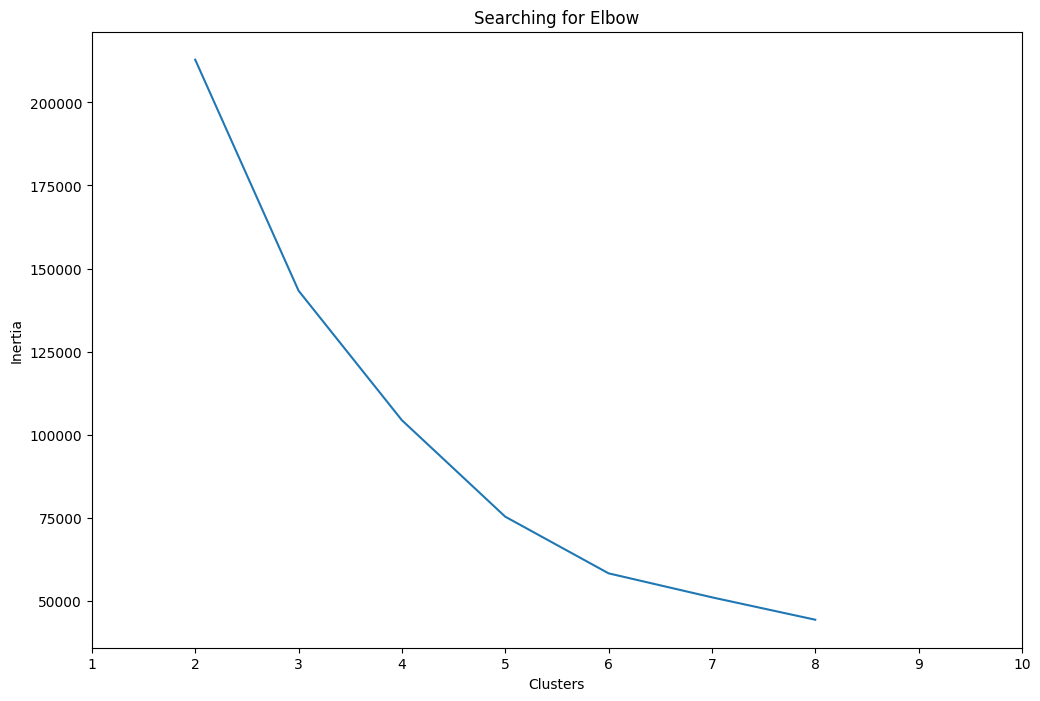

In [17]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score


X = customer_set.drop(['Gender'], axis=1)
clusters = []
start, end = 2, 9

for i in range(start, end):
    kmeans = KMeans(i).fit(X)
    clusters.append(kmeans.inertia_)
    
    coeff = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    sil_coeff = silhouette_score(X, kmeans.labels_, metric='euclidean')
    
    print(f'\nКількість кластерів: {i}')
    print(f'Коефіцієнт: {coeff}')
    print(f'Коефіцієнт силуету: {sil_coeff}')

    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(start, end)), y=clusters, ax=ax).set(xticks=(range(1,11)))
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)

Провівши декілька іспитів зі значеннями кількості кластерів в діапазонах 1-10, 2-10, 2-8, визначили де саме трапляється сильно явний "лікоть" - при значеннях в 6 та 4 кластера.
Далі вирішили спробувати знайти лікоть через розрахунок силуетного коефіцієнта. Коефіцієнт силуету при кількості кластерів в 6 є найвищий, тож є привабливим для нас.



**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

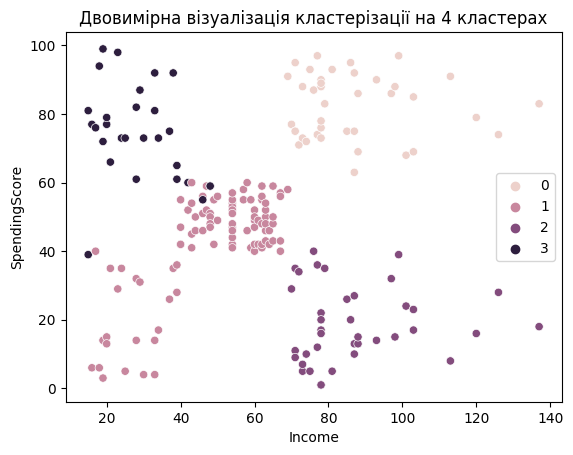

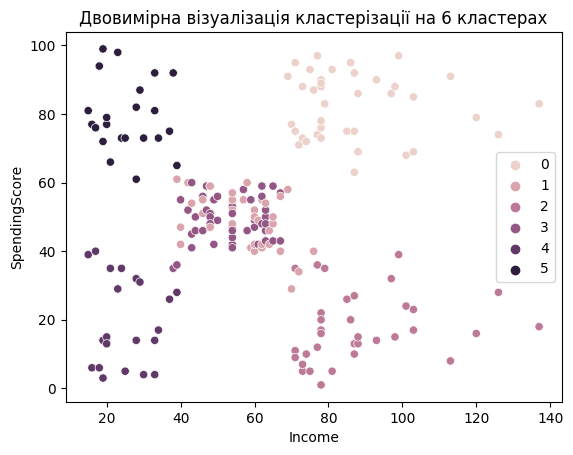

In [18]:
elbows = [4, 6]
k_means_first = KMeans(elbows[0]).fit(X)
k_means_second = KMeans(elbows[1]).fit(X)

sns.scatterplot(data=X, x='Income', y='SpendingScore', hue=k_means_first.labels_).set(title='Двовимірна візуалізація кластерізації на 4 кластерах')
plt.show()

sns.scatterplot(data=X, x='Income', y='SpendingScore', hue=k_means_second.labels_).set(title='Двовимірна візуалізація кластерізації на 6 кластерах')
plt.show()


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [19]:
fig_first = px.scatter_3d(X, x='Income', y='SpendingScore', z='Age', color=k_means_first.labels_, title='4 кластери')
fig_first.show()

fig_first = px.scatter_3d(X, x='Income', y='SpendingScore', z='Age', color=k_means_second.labels_, title='6 кластерів')
fig_first.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.

З виведених вище значень та досліджень, можемо сказати, що 6 кластерів є оптимальним значенням для нашого датасету. Хоча можна сказати, що кластери, які зображені на графіках вище фіолетовим та жовтим кольорами можна віднести до одного кластеру, але все ж залишимо 6 як оптимальнішим значенням.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


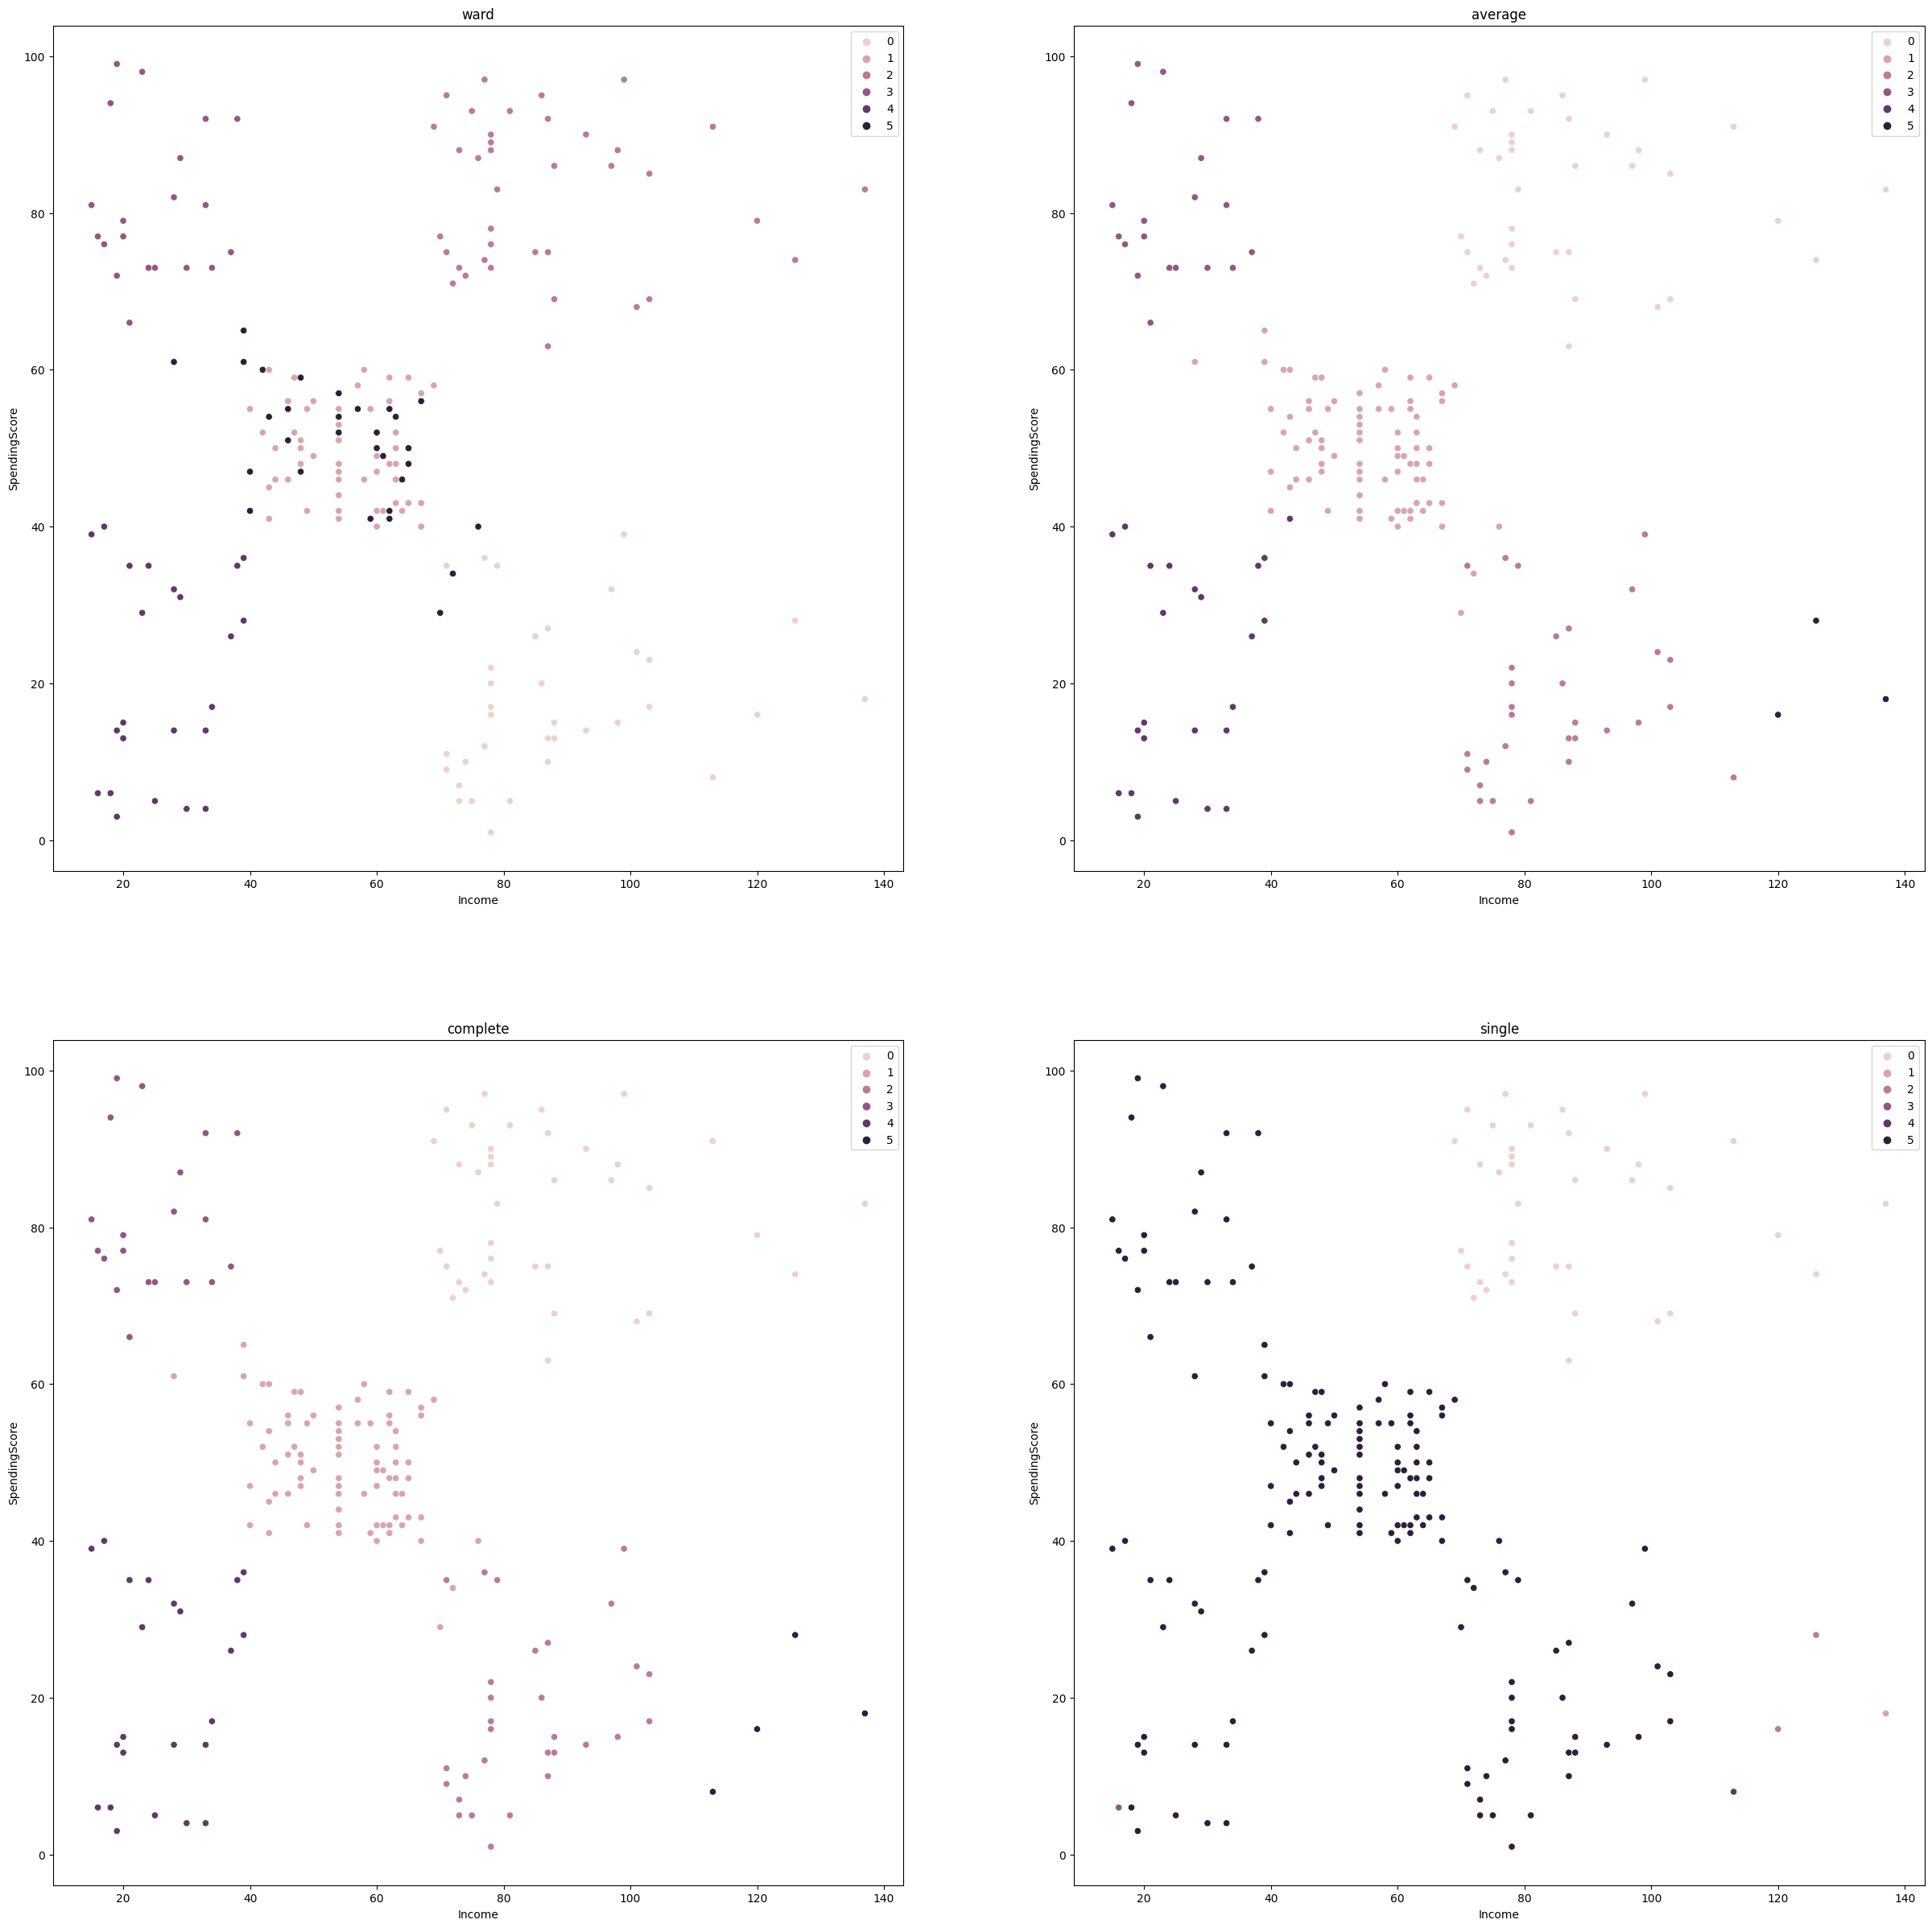

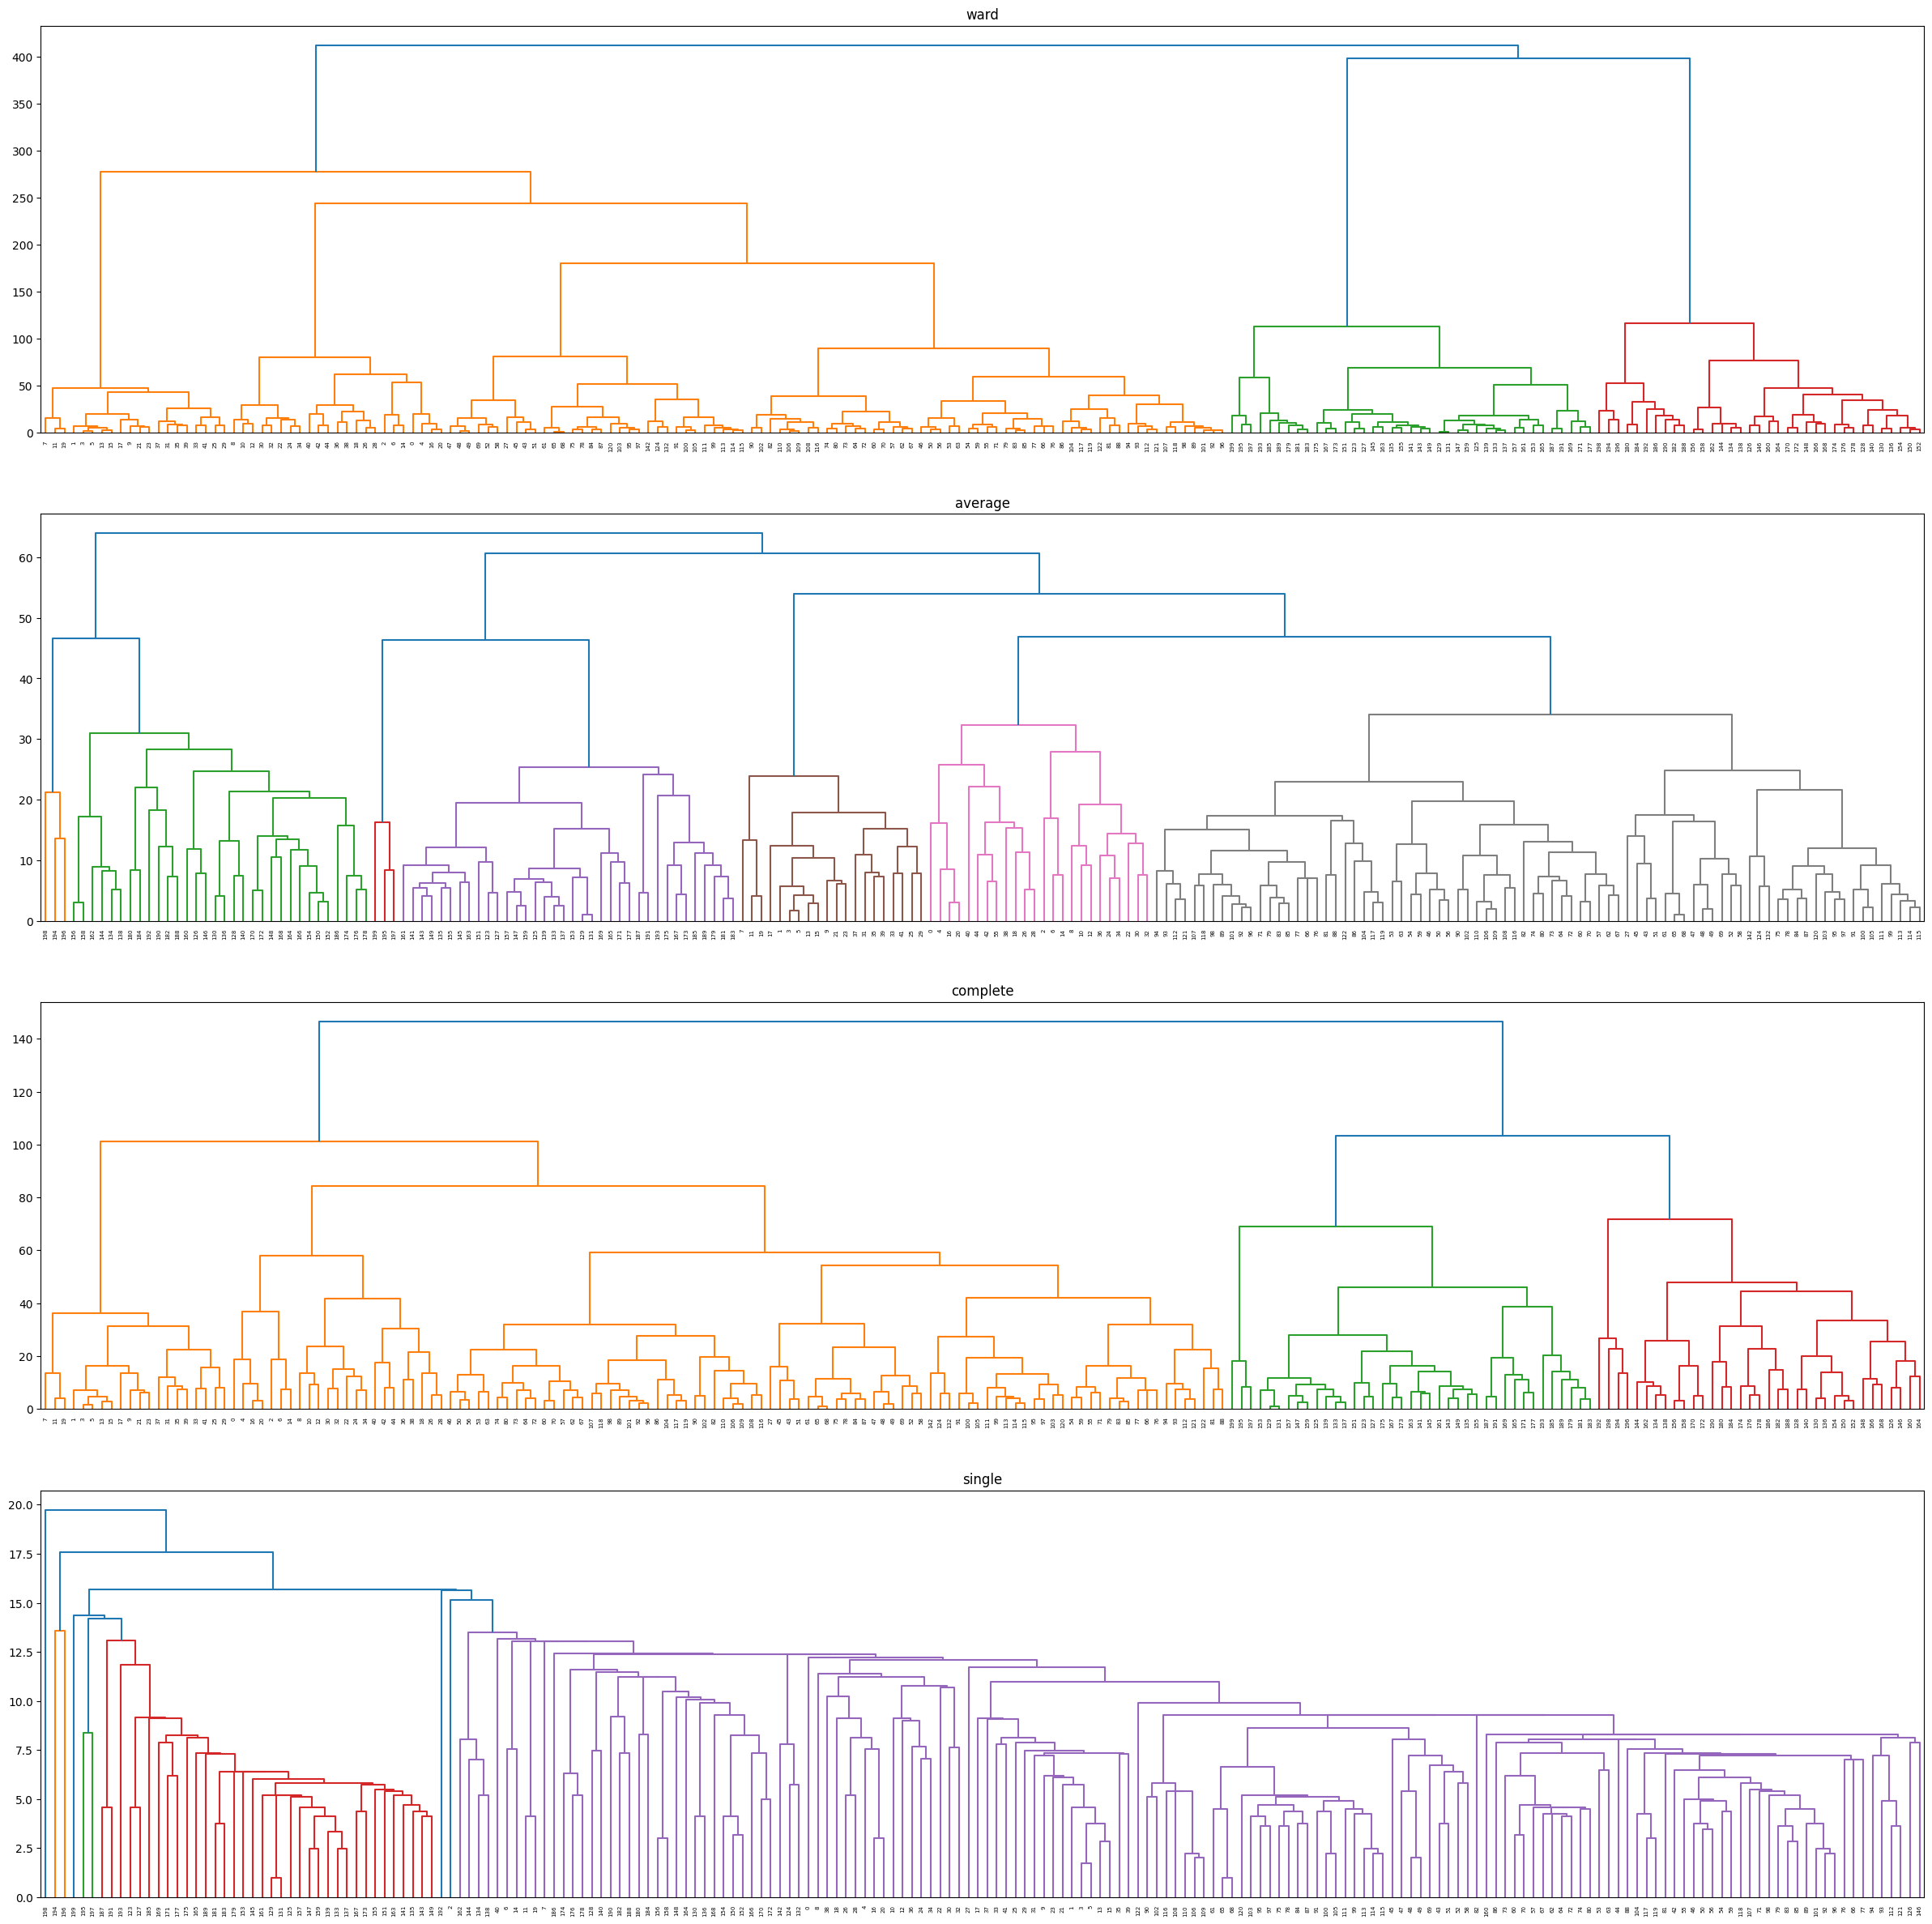

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

n_clusters = 6
methods=['ward', 'average', 'complete', 'single']

fig1, axs1 = plt.subplots(2,2,figsize=(30,30))
for method, ax in zip(methods, axs1.flatten()):
    clustering=AgglomerativeClustering(n_clusters=n_clusters, linkage=method, compute_distances=True).fit(X)
    sns.scatterplot(data=X, x='Income', y='SpendingScore', hue=clustering.labels_, ax=ax) \
        .set(title=method)
plt.show()    


fig2, axs2 = plt.subplots(4,1,figsize=(30,30))
for method, ax in zip(methods, axs2):
    matrix = linkage(X, method)
    dn = dendrogram(matrix, ax=ax)
    ax.set(title=method)
plt.show()  

**Висновки з завдання 12 (детальні)**

В даному завдані ми дослідили метод агломеративної ієрархічної кластеризації використавши функції scipy.cluster.hierarch які розрізають ієрархічні кластери на плоскі кластери або знаходять корені лісу, утвореного розрізом, надаючи плоскі ідентифікатори кластерів для кожного спостереження.

З аналізу утворених кластерів можемо визначити, що метод `single` ніякої користі не дає, в той час, як метод `ward` дає найточніші результати. Методи `average` та `complete` в `AgglomerativeClustering` дають практично однакові кластеризації, хоча на дендрограмах вони значно різні.

**Висновки з завдання 13 (детальні)**

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

In [21]:
Aggcls_method = AgglomerativeClustering(n_clusters).fit(X)
KMeans_method = KMeans(n_clusters).fit(X)

fig_kmeans = px.scatter_3d(X,
                           x='Income',
                           y='SpendingScore',
                           z='Age',
                           color=KMeans_method.labels_,
                           title='KMeans метод'
                           )
fig_kmeans.show()

fig_agg = px.scatter_3d(X,
                        x='Income',
                        y='SpendingScore',
                        z='Age',
                        color=Aggcls_method.labels_,
                        title='AgglomerativeClustering метод'
                        )
fig_agg.show()

Використавши два методи **KMeans** та **AgglomerativeClustering**, ми побачили, що дані кластеризуюця ідентично. Обрали кількість кластерів **6**, як найоптимальніше значення.
Щодо різниці даних методів, так KMeans використовує евклідову дистанцію між кожною парою семпла та зазвичай використовується для числових та просторових даних, з другого боку агломераційна ієрархічна кластерізаціє може застосовуватись як для числових так і для різних категоріальних даних.